**NOTE: This automated notebook was AI-generated using dandi-notebook-gen. Please exercise caution when interpreting the code or scientific results. Manual review is strongly recommended.**

# DANDI Dandiset 001335: Neuropixels Recordings from Hippocampus during Odor Presentation

This tutorial demonstrates how to explore and analyze data from an openly shared neurophysiology dataset.

**Citation:** Mohapatra, Manish; Halchenko, Yaroslav (2025). Neuropixels Recordings from Hippocampus of head-fixed mice during odor presentation (Version draft). DANDI Archive. https://dandiarchive.org/dandiset/001335/draft

## Dandiset Description
Head-fixed wild type male mice (~8 weeks old) were presented with various odor sequences while neural activity was recorded using Neuropixels probes targeting dorsal CA1.

The available dataset contains LFP and spike data, with annotations for different odor presentation blocks.

---

## Import necessary packages
(Please ensure the following packages are installed: `pynwb`, `remfile`, `h5py`, `dandi`, `numpy`, `matplotlib`)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pynwb
import remfile
import h5py
from dandi.dandiapi import DandiAPIClient

## Accessing Dandiset metadata through the DANDI API

In [2]:
client = DandiAPIClient()
dandiset = client.get_dandiset("001335", "draft")
assets = list(dandiset.get_assets())
print(f"Number of assets in Dandiset: {len(assets)}")
for asset in assets:
    print(asset.path)

Number of assets in Dandiset: 1
sub-M541/sub-M541_ecephys.nwb


## Load the NWB file remotely using PyNWB and remfile

We are using the main NWB file `sub-M541/sub-M541_ecephys.nwb`.

In [3]:
url = "https://api.dandiarchive.org/api/assets/aca66db7-4c02-4453-8dcb-a179d44b1c5d/download/"

rf = remfile.File(url)
hf = h5py.File(rf)
io = pynwb.NWBHDF5IO(file=hf, load_namespaces=True)
nwb = io.read()

## Explore session and subject metadata

In [4]:
print(f"Session description: {nwb.session_description}")
print(f"Experiment ID: {nwb.identifier}")
print(f"Session start time: {nwb.session_start_time}")
print(f"Experiment keywords: {nwb.keywords[:]}")
if nwb.subject:
    print(f"Subject ID: {nwb.subject.subject_id}")
    print(f"Species: {nwb.subject.species}")
    print(f"Sex: {nwb.subject.sex}")
    print(f"Age: {nwb.subject.age}")
    print(f"Subject description: {nwb.subject.description}")

Session description: Block 1:UE (ABC), Block 2:SE (DEF), Block3:Localizer
Experiment ID: M541-2024-08-31
Session start time: 2025-02-14 10:53:25.647928-05:00
Experiment keywords: ['ecephys' 'neuropixels' 'odor-sequences' 'hippocampus']
Subject ID: M541
Species: Mus musculus
Sex: M
Age: P8W/
Subject description: Headbarr-ed mouse with craniotomies over dCA1


## Experimental blocks and odor intervals

In [5]:
print("All intervals/time segments:")
for name, interval in nwb.intervals.items():
    print(f"{name}: {interval.description} columns={interval.colnames}")

All intervals/time segments:
Block 1: Interval when Block 1 odors were being presented columns=('start_time', 'stop_time')
Block 2: Interval when Block 2 odors were being presented columns=('start_time', 'stop_time')
Block 3: Interval when Block 3 odors were being presented columns=('start_time', 'stop_time')
Odor A ON: Intervals when Odor A was being presented columns=('start_time', 'stop_time')
Odor B ON: Intervals when Odor B was being presented columns=('start_time', 'stop_time')
Odor C ON: Intervals when Odor C was being presented columns=('start_time', 'stop_time')
Odor D ON: Intervals when Odor D was being presented columns=('start_time', 'stop_time')
Odor E ON: Intervals when Odor E was being presented columns=('start_time', 'stop_time')
Odor F ON: Intervals when Odor F was being presented columns=('start_time', 'stop_time')


## Channels/electrodes table

In [6]:
etable = nwb.electrodes
print("Electrode table columns:", etable.colnames)
print("First 5 electrode IDs:", etable.id[:5])

Electrode table columns: ('location', 'group', 'group_name', 'label', 'depth', 'hemisphere')
First 5 electrode IDs: [0 1 2 3 4]


## Spike Units Table

In [7]:
units = nwb.units
print("Spike unit columns:", units.colnames)
print("First 5 unit IDs:", units.id[:5])

Spike unit columns: ('depth', 'hemisphere', 'global_id', 'spike_times', 'electrode_group', 'waveform_mean')
First 5 unit IDs: [0 1 2 3 4]


## Plot spike raster of 10 units over first 5 seconds
Here we visualize the spiking activity of the first 10 identified units.

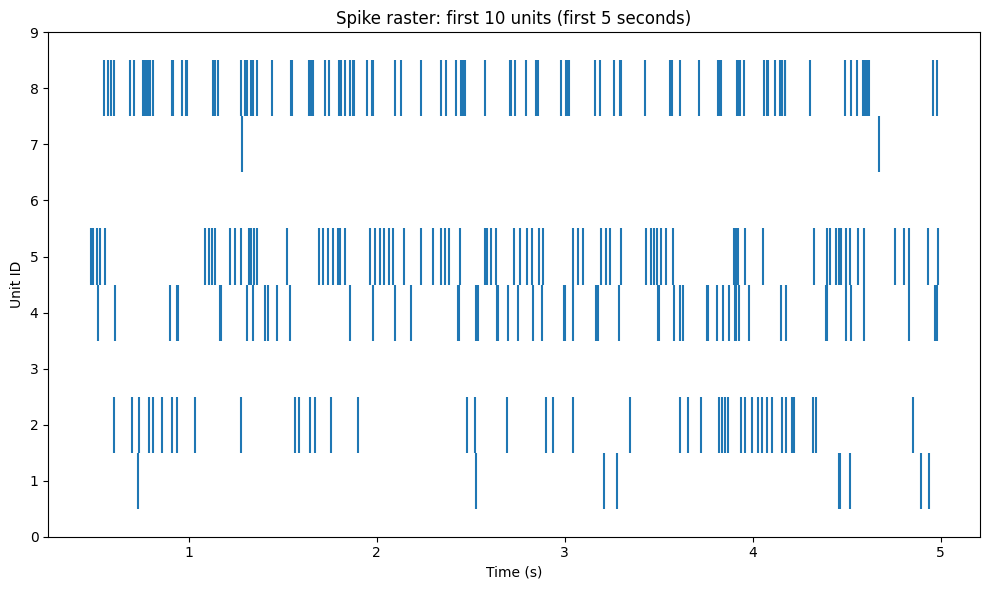

In [8]:
unit_ids = list(units.id[:])
max_units = min(10, len(unit_ids))
time_window = 5  # seconds

plt.figure(figsize=(10, 6))

for idx in range(max_units):
    unit_id = unit_ids[idx]
    spike_times = units['spike_times'][idx]
    mask = (spike_times >= 0) & (spike_times <= time_window)
    plt.vlines(spike_times[mask], idx + 0.5, idx + 1.5)

plt.xlabel('Time (s)')
plt.ylabel('Unit ID')
plt.yticks(np.arange(1, max_units + 1), unit_ids[:max_units])
plt.title(f'Spike raster: first {max_units} units (first {time_window} seconds)')

plt.tight_layout()
plt.show()


## Notes

- This notebook illustrates how to load metadata, spike times, and basic interval information from the NWB file without downloading it entirely.
- Because raw LFP data may be large and noisy/artifactual in this dataset, analysis focuses on sorted units here.
- For your own analyses, consider segmenting by odor blocks, comparing spiking or LFP characteristics, or extracting aligned data snippets.
- Extensive computational analyses such as spike sorting or LFP filtering are beyond this example scope.

---

**End of AI-generated example analysis notebook**.